In [1]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import csv
import pdb
import os
import matplotlib.pyplot as plt
import timeit
from joblib import dump, load

In [2]:
def load_data(directory, target_var):
    print("Loading data")
    full_data = []
    if directory[-1] != '/':
        directory = directory + '/'
    for root,dir,files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                filepath = directory + file
#                 print('Loading: ', file)
                csv_data = np.genfromtxt(filepath, delimiter=',')
                full_data.append(csv_data)
    features = np.vstack(full_data)
    ground_truth = features[:,target_var]
    features = np.delete(features, target_var, axis=1)
    
    return features, ground_truth, full_data
    

In [3]:
def load_file(filepath, target_var):
    csv_data = np.genfromtxt(filepath, delimiter=',')
    ground_truth = csv_data[:, target_var]
    features = np.delete(csv_data, target_var, axis=1)

    return features, ground_truth

In [4]:
truth_index = 2
start = timeit.default_timer()
training_features1, training_truth1 = load_file('/mnt/d/git/heat_chamber_code/real data/real_data_savitzky/savitzky_max40.csv', truth_index)
training_features2, training_truth2 = load_file('/mnt/d/git/heat_chamber_code/real data/real_data_savitzky/savitzky_max60run2.csv', truth_index)

In [5]:
training_features = np.concatenate((training_features1, training_features2))
training_truth = np.concatenate((training_truth1, training_truth2))

In [6]:
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(training_features, training_truth)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [7]:
test_features, test_truth= load_file('/mnt/d/git/heat_chamber_code/real data/real_data_savitzky/savitzky_max60run1.csv', truth_index)
score = forest.score(test_features, test_truth)
test_predictions = []
temp_err = []
index = 0

In [8]:
for row in test_features:
    prediction = forest.predict([row])
    test_predictions.append(prediction)
    temp_err.append(100*abs((test_truth[index] - prediction)/test_truth[index]))
    index = index + 1

In [9]:
print("Score: ", score)

Score:  0.9355977245680756


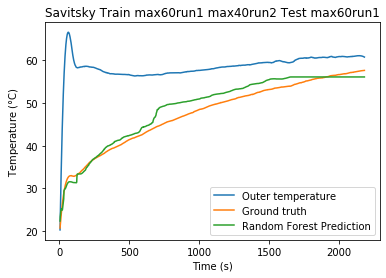

In [10]:
plt.figure
plt.plot(test_features[:,0], test_features[:,1], label="Outer temperature")
plt.plot(test_features[:,0], test_truth, label="Ground truth")
plt.plot(test_features[:,0], test_predictions, label="Random Forest Prediction")
plt.legend(loc="lower right")
plt.xlabel('Time (s)')
plt.ylabel('Temperature ($\degree$C)')
plt.title('Savitsky Train max60run1 max40run2 Test max60run1')
plt.show()

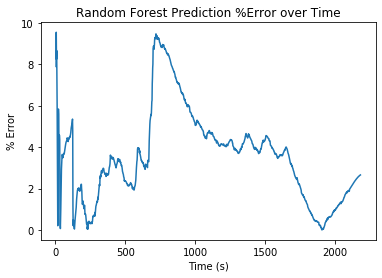

In [11]:
plt.figure
plt.plot(test_features[:,0], temp_err)
plt.xlabel('Time (s)')
plt.ylabel('% Error')
plt.title('Random Forest Prediction %Error over Time')
plt.show()

In [12]:
train_x, train_y = load_file('/mnt/d/git/heat_chamber_code/real data/real_data_savitzky/savitzky_max60run1.csv', truth_index)
forest = RandomForestRegressor(n_estimators=50, random_state=42)
forest.fit(training_features, training_truth)
test_x, test_y= load_file('/mnt/d/git/heat_chamber_code/real data/real_data_savitzky/savitzky_max60run2.csv', truth_index)
score = forest.score(test_x, test_y)

In [13]:
test_predictions = []
temp_err = []
index = 0
for row in test_x:
    prediction = forest.predict([row])
    test_predictions.append(prediction)
    temp_err.append(100*abs((test_y[index] - prediction)/test_y[index]))
    index = index + 1

In [14]:
print(score)

0.9999571272929826


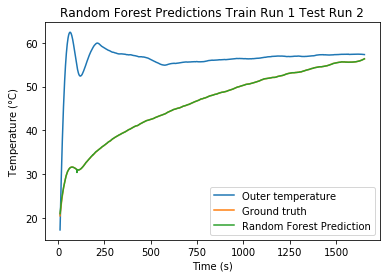

In [15]:
plt.figure
plt.plot(test_x[:,0], test_x[:,1], label="Outer temperature")
plt.plot(test_x[:,0], test_y, label="Ground truth")
plt.plot(test_x[:,0], test_predictions, label="Random Forest Prediction")
plt.legend(loc="lower right")
plt.xlabel('Time (s)')
plt.ylabel('Temperature ($\degree$C)')
plt.title('Random Forest Predictions Train Run 1 Test Run 2')
plt.show()

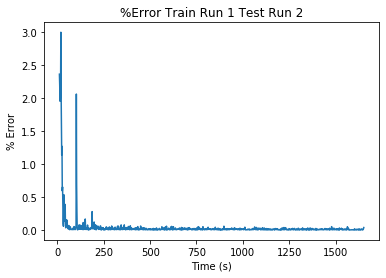

In [16]:
plt.figure
plt.plot(test_x[:,0], temp_err)
plt.xlabel('Time (s)')
plt.ylabel('% Error')
plt.title('%Error Train Run 1 Test Run 2')
plt.show()

In [17]:
train_x, train_y = load_file('/mnt/d/git/heat_chamber_code/real data/real_data_savitzky/savitzky_max60run2.csv', truth_index)
forest = RandomForestRegressor(n_estimators=50, random_state=42)
forest.fit(training_features, training_truth)
test_x, test_y= load_file('/mnt/d/git/heat_chamber_code/real data/real_data_savitzky/savitzky_max60run1.csv', truth_index)
score = forest.score(test_x, test_y)

In [18]:
test_predictions = []
temp_err = []
index = 0
for row in test_x:
    prediction = forest.predict([row])
    test_predictions.append(prediction)
    temp_err.append(100*abs((test_y[index] - prediction)/test_y[index]))
    index = index + 1

In [19]:
print(score)

0.9337333412588135


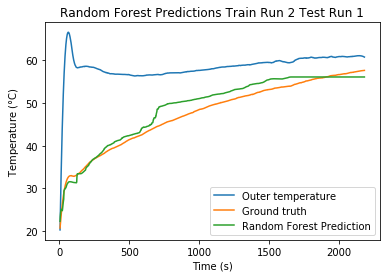

In [20]:
plt.figure
plt.plot(test_x[:,0], test_x[:,1], label="Outer temperature")
plt.plot(test_x[:,0], test_y, label="Ground truth")
plt.plot(test_x[:,0], test_predictions, label="Random Forest Prediction")
plt.legend(loc="lower right")
plt.xlabel('Time (s)')
plt.ylabel('Temperature ($\degree$C)')
plt.title('Random Forest Predictions Train Run 2 Test Run 1')
plt.show()

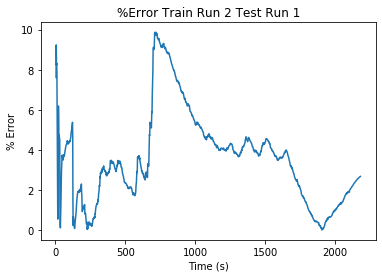

In [21]:
plt.figure
plt.plot(test_x[:,0], temp_err)
plt.xlabel('Time (s)')
plt.ylabel('% Error')
plt.title('%Error Train Run 2 Test Run 1')
plt.show()

In [22]:
stop = timeit.default_timer()
print('Time: ', stop - start)  

Time:  38.25634769999999
